In [ ]:
%load_ext autoreload
%autoreload 2
import sys
import os

# Add the PowerFactory Python API to the path # TODO: Update this path to match your PowerFactory installation
sys.path.append("C:/Program Files/DIgSILENT/PowerFactory 2024 SP4A/Python/3.12")

# Add the src directory to Python path for development
sys.path.append(os.path.join(os.getcwd(), "..")) 

import powerfactory as pf
from src.pfapi.core.Network import Network  
import src.pfapi.utils.ImportModels as ImportModels
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

# Initialize PowerFactory application and import 39-bus system model for this example
print("Initializing PowerFactory application...")
app: pf.Application = pf.GetApplicationExt()
ImportModels.import_pfd_file(app)
app.Show()

Initializing PowerFactory application...


In [85]:
# Initialize the Network object (reads topology and connected components)
network = Network(app, base_mva=100.0)

INFO: Processed 39 valid busbars
INFO: Running load flow analysis to obtain busbar results...
INFO: Reading network elements from PowerFactory...
INFO: Successfully read 75 classified elements from PF
INFO: Classified element counts:
INFO:   ElmLne: 34
INFO:   ElmTr2: 12
INFO:   ElmLod: 19
INFO:   ElmSym: 10


In [86]:
# Obtain network admittance matrix
from src.pfapi.utils.AdmittanceMatrix import build_admittance_matrix
import pandas as pd
Y_bus = build_admittance_matrix(network, as_dataframe=True)
Y_bus.head(10) if isinstance(Y_bus, pd.DataFrame) else None


,Bus 01,Bus 02,Bus 03,Bus 04,Bus 05,Bus 06,Bus 07,Bus 08,Bus 09,Bus 10,...,Bus 30,Bus 31,Bus 32,Bus 33,Bus 34,Bus 35,Bus 36,Bus 37,Bus 38,Bus 39
Bus 01,3.654501-63.367475j,-2.057057+ 24.155724j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,...,0.000000+ 0.000000j,0.0+ 0.0j,0.0+ 0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-1.597444+39.936102j
Bus 02,-2.057057+24.155724j,64.645696-214.532758j,-5.659555+ 65.737921j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,...,0.000000+55.248618j,0.0+ 0.0j,0.0+ 0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+ 0.000000j
Bus 03,0.000000+ 0.000000j,-5.659555+ 65.737921j,17.724759-186.865602j,-2.854758+ 46.774118j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,...,0.000000+ 0.000000j,0.0+ 0.0j,0.0+ 0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+ 0.000000j
Bus 04,0.000000+ 0.000000j,0.000000+ 0.000000j,-2.854758+ 46.774118j,17.469151-203.396477j,-4.863813+ 77.821007j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,...,0.000000+ 0.000000j,0.0+ 0.0j,0.0+ 0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+ 0.000000j
Bus 05,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,-4.863813+ 77.821007j,40.620745-548.843796j,-29.411756+382.352909j,0.000000+ 0.000000j,-6.345176+ 88.832481j,0.000000+ 0.000000j,0.000000+ 0.000000j,...,0.000000+ 0.000000j,0.0+ 0.0j,0.0+ 0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+ 0.000000j
Bus 06,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,-29.411756+382.352909j,46.805735-651.509491j,-7.058825+108.235292j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,...,0.000000+ 0.000000j,0.0+40.0j,0.0+ 0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+ 0.000000j
Bus 07,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,-7.058825+108.235292j,28.172638-324.744698j,-18.761728+215.759845j,0.000000+ 0.000000j,0.000000+ 0.000000j,...,0.000000+ 0.000000j,0.0+ 0.0j,0.0+ 0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+ 0.000000j
Bus 08,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,-6.345176+ 88.832481j,0.000000+ 0.000000j,-18.761728+215.759845j,32.107205-333.501474j,-1.738499+27.438055j,0.000000+ 0.000000j,...,0.000000+ 0.000000j,0.0+ 0.0j,0.0+ 0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+ 0.000000j
Bus 09,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,-1.738499+ 27.438055j,3.335943-66.583955j,0.000000+ 0.000000j,...,0.000000+ 0.000000j,0.0+ 0.0j,0.0+ 0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-1.597444+39.936102j
Bus 10,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,0.000000+ 0.000000j,42.895449-511.053114j,...,0.000000+ 0.000000j,0.0+ 0.0j,0.0+50.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+ 0.000000j


In [87]:
from src.pfapi.utils.AdmittanceMatrix import reduce_matrix
import numpy as np
import pandas as pd

# Reduce the admittance matrix to only generator buses
Y_bus = build_admittance_matrix(network, as_dataframe=False)
if not isinstance(Y_bus, np.ndarray):
    raise TypeError("Y_bus must be a numpy ndarray, but got type {}".format(type(Y_bus)))
reduced_Y_bus, generator_bus_names_order = reduce_matrix(Y_bus, network)
# pd.DataFrame(reduced_Y_bus, index=generator_bus_names_order, columns=generator_bus_names_order) # Only for printing the reduced matrix

In [88]:
from src.pfapi.core.synchro_power_coefficients import calculate_power_distribution_ratios

# Calculate synchronizing power coefficients
GEN_OUT = "G 04" # Define the geenerator name where outage occurs
ratios = calculate_power_distribution_ratios(reduced_Y_bus, generator_bus_names_order, network, GEN_OUT)

# Display the synchronizing power coefficients
print(f"Synchronizing power coefficients for outage of generator {GEN_OUT}:")
print(ratios)

INFO: Calculating synchronizing power coefficients for disturbance bus: Bus 33 at index 3


Synchronizing power coefficients for outage of generator G 04:
[0.11299691 0.05549655 0.0781816  0.         0.17771765 0.15800495
 0.12511425 0.06399661 0.06675982 0.16173166]


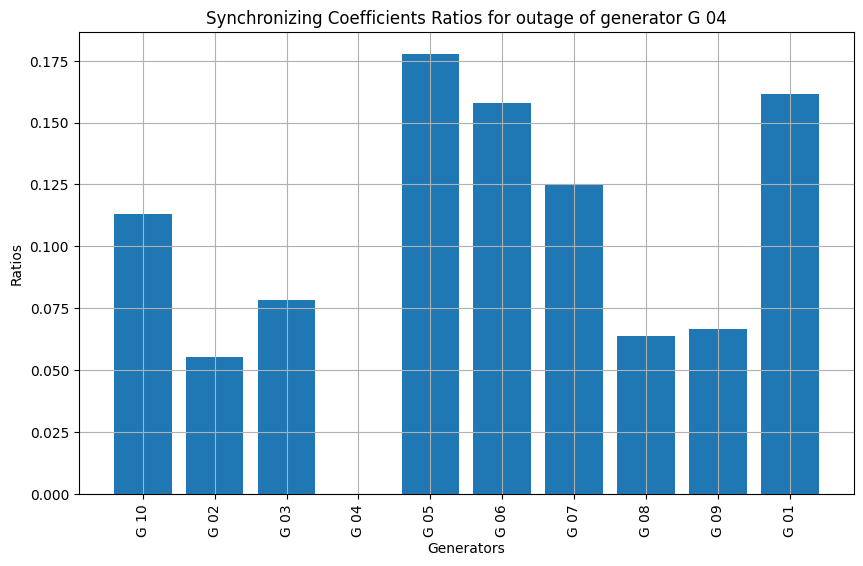

In [89]:
# Convert generator_bus_names to generator_names order
generator_names_order = [network.get_generator_name_from_busbar(bus) for bus in generator_bus_names_order]

# Plot the ratios
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(generator_names_order, ratios)
plt.xlabel('Generators')
plt.ylabel('Ratios')
plt.title('Synchronizing Coefficients Ratios for outage of generator {}'.format(GEN_OUT))
plt.xticks(rotation=90)
plt.grid(True)
plt.show()